## Using saved models

In this notebook, we will show the steps to use an already saved model. First, download the saved model and then run the following codes. All the saved models can be found at [this link](https://github.com/biswajitsahoo1111/cbm_codes_open/tree/master/notebooks/saved_models).

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model("./saved_models/CWRU_LeNet_raw_time_domain_data.h5")
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_25 (Dense)             (None, 84)               

Now get the test data on which you want to get inference results. Usually, this is a hold out set for which we don't know the actual outcome. In that case, we can use `model.predict` to obtain class probabilities and then use `np.argmax` to get the predicted class. But for our case, we will only check that this saved model produces the same result that we obtained while training the model from scratch. For that reason we will again load the data, split it into training and test set and only use the test set to make predictions. We will then use the known labels of test set to plot the confusion matrix.

In [3]:
file = np.load('./data/CWRU_48k_load_1_CNN_data.npz')
print(file.files)

['data', 'labels']


In [4]:
data = file['data']
labels = file['labels']
print(data.shape, labels.shape)

(4600, 32, 32) (4600,)


In [5]:
category_labels = np.unique(labels)
print(category_labels)

['Ball_007' 'Ball_014' 'Ball_021' 'IR_007' 'IR_014' 'IR_021' 'Normal'
 'OR_007' 'OR_014' 'OR_021']


In [6]:
labels = pd.Categorical(labels, categories = category_labels).codes

## Train test split
Keep only the test part.

In [7]:
_, test_data, _, test_labels = train_test_split(data, labels, test_size = 1300, random_state = 829, 
                                                                    stratify = labels)

In [8]:
# reshape data
test_data = test_data.reshape(1300,32,32,1)
print(test_data.shape, test_labels.shape)

(1300, 32, 32, 1) (1300,)


In [9]:
predictions = model.predict(test_data)
prediction_labels = np.argmax(predictions, axis = 1)

## Accuracy of the model

In [10]:
accuracy = accuracy_score(test_labels, prediction_labels)
print("Accuracy of best model:", accuracy)

Accuracy of best model: 0.9707692307692307


Note that this is the accuracy of the best model during training process as we had saved only the best model. 

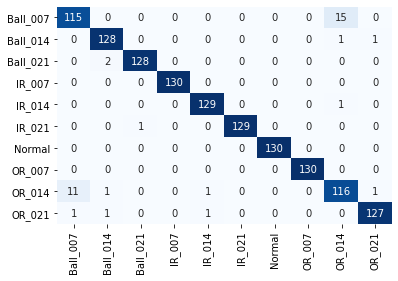

In [11]:
# Confusion matrix
matrix = confusion_matrix(test_labels, prediction_labels)
matrix = pd.DataFrame(matrix)
plt.figure()
sns.heatmap(matrix, annot= True, fmt = "d",
           xticklabels = category_labels,
           yticklabels = category_labels, cmap = "Blues", cbar = False)
plt.xticks(rotation = 90)
plt.show()

The above procedure can be used for all saved models to reproduce the exact result that we have obtained while training the model.